In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=77b5f013dde17970fb37d6415a3c845f


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [11]:
cities

['carnarvon',
 'hermanus',
 'hithadhoo',
 'cherskiy',
 'saint-philippe',
 'busselton',
 'cape town',
 'port elizabeth',
 'magugu',
 'taolanaro',
 'talnakh',
 'vila franca do campo',
 'bluff',
 'oistins',
 'sistranda',
 'mpongwe',
 'ushuaia',
 'nuuk',
 'massakory',
 'zhezkazgan',
 'vaini',
 'butaritari',
 'victoria',
 'thunder bay',
 'dikson',
 'lompoc',
 'san ignacio',
 'smithers',
 'glendive',
 'punta arenas',
 'novo aripuana',
 'sembakung',
 'castro',
 'albany',
 'berlevag',
 'pevek',
 'la ronge',
 'isangel',
 'geraldton',
 'hilo',
 'gat',
 'nikolskoye',
 'koutsouras',
 'jamestown',
 'thompson',
 'ancud',
 'kruisfontein',
 'nizhnyaya omka',
 'qaanaaq',
 'mocuba',
 'mount isa',
 'chuguyevka',
 'shelburne',
 'georgetown',
 'lipin bor',
 'souillac',
 'tasiilaq',
 'buala',
 'barrow',
 'belmonte',
 'alice springs',
 'longyearbyen',
 'san quintin',
 'hwange',
 'mataura',
 'hasaki',
 'iqaluit',
 'slave lake',
 'vardo',
 'taltal',
 'rikitea',
 'vaitupu',
 'lao cai',
 'barentsburg',
 'sayyan'

In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | carnarvon
Processing Record 2 of Set 13 | hermanus
Processing Record 3 of Set 13 | hithadhoo
Processing Record 4 of Set 13 | cherskiy
Processing Record 5 of Set 13 | saint-philippe
Processing Record 6 of Set 13 | busselton
Processing Record 7 of Set 13 | cape town
Processing Record 8 of Set 13 | port elizabeth
Processing Record 9 of Set 13 | magugu
Processing Record 10 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 13 | talnakh
Processing Record 12 of Set 13 | vila franca do campo
Processing Record 13 of Set 13 | bluff
Processing Record 14 of Set 13 | oistins
Processing Record 15 of Set 13 | sistranda
Processing Record 16 of Set 13 | mpongwe
Processing Record 17 of Set 13 | ushuaia
Processing Record 18 of Set 13 | nuuk
Processing Record 19 of Set 13 | massakory
Processing Record 20 of Set 13 | zhezkazgan
Processing Record 21 of Set 13 | vaini
Processing Record 22 of Set 13 | butaritari
Processing Record 23 of Set 13 | victo

Processing Record 35 of Set 16 | primorsk
Processing Record 36 of Set 16 | chokurdakh
Processing Record 37 of Set 16 | asyut
Processing Record 38 of Set 16 | necochea
Processing Record 39 of Set 16 | sao raimundo das mangabeiras
Processing Record 40 of Set 16 | port alfred
Processing Record 41 of Set 16 | gimli
Processing Record 42 of Set 16 | gushi
Processing Record 43 of Set 16 | tuktoyaktuk
Processing Record 44 of Set 16 | waipahu
Processing Record 45 of Set 16 | severnyy
Processing Record 46 of Set 16 | krapivinskiy
Processing Record 47 of Set 16 | rundu
Processing Record 48 of Set 16 | marcona
City not found. Skipping...
Processing Record 49 of Set 16 | camargo
Processing Record 50 of Set 16 | palmer
Processing Record 1 of Set 17 | bom jardim
Processing Record 2 of Set 17 | dekar
Processing Record 3 of Set 17 | antofagasta
Processing Record 4 of Set 17 | leningradskiy
Processing Record 5 of Set 17 | napoleon
Processing Record 6 of Set 17 | mastic beach
Processing Record 7 of Set 1

Processing Record 23 of Set 20 | san vicente
Processing Record 24 of Set 20 | aklavik
Processing Record 25 of Set 20 | moose factory
Processing Record 26 of Set 20 | taoudenni
Processing Record 27 of Set 20 | portland
Processing Record 28 of Set 20 | jalu
Processing Record 29 of Set 20 | maragogi
Processing Record 30 of Set 20 | ouahigouya
Processing Record 31 of Set 20 | kamenskoye
City not found. Skipping...
Processing Record 32 of Set 20 | baruun-urt
Processing Record 33 of Set 20 | champerico
Processing Record 34 of Set 20 | sur
Processing Record 35 of Set 20 | omboue
Processing Record 36 of Set 20 | hokitika
Processing Record 37 of Set 20 | dunedin
Processing Record 38 of Set 20 | maniitsoq
Processing Record 39 of Set 20 | one hundred mile house
City not found. Skipping...
Processing Record 40 of Set 20 | port moresby
Processing Record 41 of Set 20 | bosaso
Processing Record 42 of Set 20 | ewo
Processing Record 43 of Set 20 | daru
Processing Record 44 of Set 20 | puerto escondido


Processing Record 9 of Set 24 | sinazongwe
Processing Record 10 of Set 24 | maceio
Processing Record 11 of Set 24 | mouzakion
City not found. Skipping...
Processing Record 12 of Set 24 | richards bay
Processing Record 13 of Set 24 | koppang
Processing Record 14 of Set 24 | falealupo
City not found. Skipping...
Processing Record 15 of Set 24 | powell river
Processing Record 16 of Set 24 | fairbanks
Processing Record 17 of Set 24 | grindavik
Processing Record 18 of Set 24 | touba
Processing Record 19 of Set 24 | grand forks
Processing Record 20 of Set 24 | tucurui
Processing Record 21 of Set 24 | suntar
Processing Record 22 of Set 24 | sumbawa
City not found. Skipping...
Processing Record 23 of Set 24 | monticello
Processing Record 24 of Set 24 | pedana
Processing Record 25 of Set 24 | grand gaube
Processing Record 26 of Set 24 | lincoln
Processing Record 27 of Set 24 | beringovskiy
Processing Record 28 of Set 24 | muravlenko
Processing Record 29 of Set 24 | glazunovka
Processing Record 

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carnarvon,-24.8667,113.6333,69.87,78,40,21.85,AU,2021-11-30 17:16:58
1,Hermanus,-34.4187,19.2345,66.90,73,74,9.73,ZA,2021-11-30 17:16:58
2,Hithadhoo,-0.6000,73.0833,82.11,75,13,7.63,MV,2021-11-30 17:16:58
3,Cherskiy,68.7500,161.3000,-13.95,98,100,5.77,RU,2021-11-30 17:16:59
4,Saint-Philippe,-21.3585,55.7679,76.59,79,46,8.93,RE,2021-11-30 17:16:59
5,Busselton,-33.6500,115.3333,49.08,82,0,7.09,AU,2021-11-30 17:16:59
6,Cape Town,-33.9258,18.4232,69.10,57,70,10.49,ZA,2021-11-30 17:12:02
7,Port Elizabeth,-33.9180,25.5701,65.10,77,0,10.36,ZA,2021-11-30 17:17:00
8,Magugu,-4.0167,35.7667,75.88,61,83,5.99,TZ,2021-11-30 17:17:00
9,Talnakh,69.4865,88.3972,-20.79,95,72,8.03,RU,2021-11-30 17:17:01


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


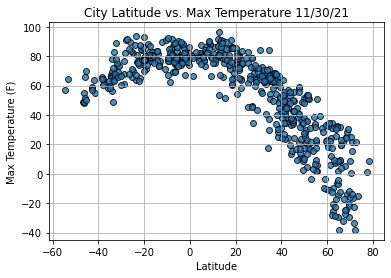

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

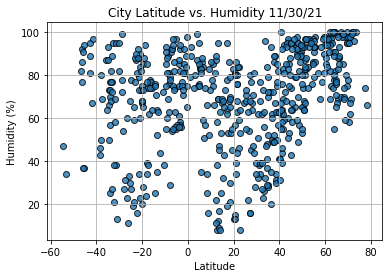

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

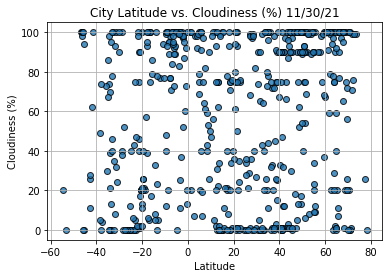

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

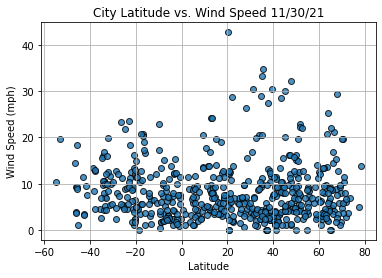

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

# Import linregress
    from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
# Create a new DataFrame from a current DataFrame by using loc method on the current DataFrame
index13 = city_data_df.loc[13]
index13

City                    Sistranda
Lat                       63.7256
Lng                         8.834
Max Temp                    31.96
Humidity                       55
Cloudiness                    100
Wind Speed                  13.56
Country                        NO
Date          2021-11-30 17:17:02
Name: 13, dtype: object

In [22]:
city_data_df["Lat"]

0     -24.8667
1     -34.4187
2      -0.6000
3      68.7500
4     -21.3585
        ...   
554    60.7167
555    48.0056
556   -27.4144
557    21.3469
558    18.3778
Name: Lat, Length: 559, dtype: float64

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Cherskiy,68.7500,161.3000,-13.95,98,100,5.77,RU,2021-11-30 17:16:59
9,Talnakh,69.4865,88.3972,-20.79,95,72,8.03,RU,2021-11-30 17:17:01
10,Vila Franca Do Campo,37.7167,-25.4333,65.19,86,98,13.24,PT,2021-11-30 17:17:01
12,Oistins,13.0667,-59.5333,82.49,69,75,24.16,BB,2021-11-30 17:17:02
13,Sistranda,63.7256,8.8340,31.96,55,100,13.56,NO,2021-11-30 17:17:02


In [24]:
# Create Northern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Cherskiy,68.7500,161.3000,-13.95,98,100,5.77,RU,2021-11-30 17:16:59
9,Talnakh,69.4865,88.3972,-20.79,95,72,8.03,RU,2021-11-30 17:17:01
10,Vila Franca Do Campo,37.7167,-25.4333,65.19,86,98,13.24,PT,2021-11-30 17:17:01
12,Oistins,13.0667,-59.5333,82.49,69,75,24.16,BB,2021-11-30 17:17:02
13,Sistranda,63.7256,8.8340,31.96,55,100,13.56,NO,2021-11-30 17:17:02


In [25]:
# Create Southern Hemisphere DataFrames.
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carnarvon,-24.8667,113.6333,69.87,78,40,21.85,AU,2021-11-30 17:16:58
1,Hermanus,-34.4187,19.2345,66.90,73,74,9.73,ZA,2021-11-30 17:16:58
2,Hithadhoo,-0.6000,73.0833,82.11,75,13,7.63,MV,2021-11-30 17:16:58
4,Saint-Philippe,-21.3585,55.7679,76.59,79,46,8.93,RE,2021-11-30 17:16:59
5,Busselton,-33.6500,115.3333,49.08,82,0,7.09,AU,2021-11-30 17:16:59


In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

# Save the figure.
plt.savefig("weather_data/Fig5.png")

NameError: name 'linregress' is not defined

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

# Save the figure.
plt.savefig("weather_data/Fig6.png")

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))